# Proposed toolkit for web scraping

## HTTP client

In [ ]:
import requests

response = requests.get('url')

## HTTP parser

In [ ]:
from bs4 import BeautifulSoup

soup.findAll(lambda tag: len(tag.attrs) == 2)


## Browser automation tool

In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wait = WebDriverWait(driver, 10)
driver.get("https://docs.google.com/forms/d/e/1FAIpQLSc3zh-qETI2WDHgxXCGZ0JtMxdTYdWZ0zwNc2Y3NjythtBl0g/viewform?fbzx=-599222426261136088")
wait.until(EC.element_to_be_clickable((By.XPATH, "//span[text()='Next']"))).click()
wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "label[for='i8']"))).click()
wait.until(EC.element_to_be_clickable((By.XPATH, "//span[text()='Submit']"))).click()
print("Operation successful !")

## Web Scraping library

# Scraped image collections [explore]

## Reliably request

In [ ]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup

In [ ]:
def getHtml(url):
  try:
    html = urlopen(url)
  except HTTPError as e:
    print(e)
    return None

  try:
    bsObj = BeautifulSoup(html)
    title = bsObj.body.h1
  except AttributeError as e:
    return None
  
  return bsObj

In [ ]:
html = getHtml("https://www.lonabol.gob.bo/web2/")
if html is None:
  print("URL is not found")

array1 = html.find('img').children
#array1 = html.find('head').style.next_siblings
#
#for data in html.find('table'):
#  print(data)

## Regular expressions and beutifulSoup

In [ ]:
from urllib.request import re

images =  html.findAll("img", {'src':re.compile("assets\/img/solidaria/ays.*\.png")}) + html.findAll("img", {'src':re.compile("assets\/img/solidaria/as.*\.png") }) + html.findAll("img", {'src':re.compile("assets\/img/solidaria/aynisoli.*\.png") })
print(images)
for image in images:
  print(image['src'])

[<img alt="" class="img-fluid" src="assets/img/solidaria/ays1.png"/>, <img alt="" class="img-fluid" src="assets/img/solidaria/as4.png"/>, <img alt="" class="img-fluid" src="assets/img/solidaria/asentrerios2.png"/>, <img alt="" class="img-fluid" src="assets/img/solidaria/ascbba.png"/>, <img alt="" class="img-fluid" src="assets/img/solidaria/aynisoli.png"/>]
assets/img/solidaria/ays1.png
assets/img/solidaria/as4.png
assets/img/solidaria/asentrerios2.png
assets/img/solidaria/ascbba.png
assets/img/solidaria/aynisoli.png


# Types of data collection strategies

## Collect data from entire Web Page [explore]

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random
import re

In [ ]:
pages = set()
def getFullLinks(articleUrl):
  global pages
  html = urlopen("http://en.wikipedia.org"+articleUrl)
  bsObj = BeautifulSoup(html)

  for link in bsObj.findAll("a", href=re.compile("^(/wiki/)")):
    if 'href' in link.attrs:
      if link.attrs['href'] not in pages:
        #We have encountered a new page
        newPage = link.attrs['href']
        print(newPage)
        pages.add(newPage)
        getLinks(newPage)

In [ ]:
random.seed(datetime.datetime.now())
getFullLinks("")

/wiki/Wikipedia
/wiki/Wikipedia:Protection_policy#semi
/wiki/Wikipedia:Requests_for_page_protection
/wiki/Wikipedia:Requests_for_page_protection/Administrator_instructions
/wiki/Wikipedia:Protection_policy
/wiki/Wikipedia:Lists_of_protected_pages
/wiki/Wikipedia:Protection_policy#Semi-protection
/wiki/Wikipedia:Perennial_proposals
/wiki/Wikipedia:Reliable_sources/Perennial_sources
/wiki/Wikipedia:Reliable_sources
/wiki/Wikipedia:WikiProject_Reliability
/wiki/Wikipedia:WRE
/wiki/File:People_icon.svg
/wiki/Special:WhatLinksHere/File:People_icon.svg


KeyboardInterrupt: ignored

## Collect entire data from Internet [explore]

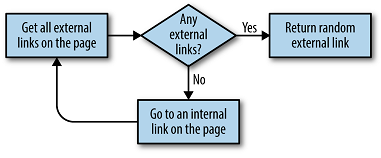

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random
import re

In [ ]:
#Retrieves a list of all Internal links found on a page
def getInternalLinks(bsObj, includeUrl):
  internalLinks = []
  #Finds all links that begin with a "/"
  for link in bsObj.findAll("a", href=re.compile("^(/|.*"+includeUrl+")")):
    if link.attrs['href'] is not None:
      if link.attrs['href'] not in internalLinks:
        internalLinks.append(link.attrs['href'])
  return internalLinks


In [ ]:
#Retrieves a list of all external links found on a page
def getExternalLinks(bsObj, excludeUrl):
  externalLinks = []
  #Finds all links that start with "http" or "www" that do
  #not contain the current URL
  for link in bsObj.findAll("a",
    href=re.compile("^(http|www)((?!"+excludeUrl+").)*$")):
    if link.attrs['href'] is not None:
      if link.attrs['href'] not in externalLinks:
        externalLinks.append(link.attrs['href'])
  return externalLinks


In [ ]:
def splitAddress(address):
  addressParts = address.replace("http://", "").split("/")
  return addressParts

def getRandomExternalLink(startingPage):
  html = urlopen(startingPage)
  bsObj = BeautifulSoup(html)
  externalLinks = getExternalLinks(bsObj, splitAddress(startingPage)[0])
  if len(externalLinks) == 0:
    internalLinks = getInternalLinks(bsObj,startingPage)
    
    return getExternalLinks(bsObj,internalLinks[random.randint(0, len(internalLinks)-1)])
  else:
    return externalLinks[random.randint(0, len(externalLinks)-1)]

def followExternalOnly(startingSite):
  externalLink = getRandomExternalLink(startingSite)
  print("Random external link is: ",externalLink)
  
  followExternalOnly(externalLink)

In [ ]:
followExternalOnly("http://www.wikipedia.com")

Random external link is:  https://meta.wikimedia.org/wiki/Terms_of_use
Random external link is:  https://meta.wikimedia.org/wiki/Copyright_problems
Random external link is:  https://en.wikisource.org/wiki/en:Wikisource:Possible_copyright_violations
Random external link is:  https://commons.wikimedia.org/wiki/Template:PD-US-unpublished
Random external link is:  https://foundation.wikimedia.org/wiki/Privacy_policy
Random external link is:  https://meta.wikimedia.org/wiki/Privacy_policy/be-tarask
Random external link is:  https://foundation.wikimedia.org/wiki/Wikimedia:General_disclaimer
Random external link is:  https://meta.wikimedia.org/wiki/Fundraising/Reports
Random external link is:  https://wikimediafoundation.org/wiki/File:2010-2011_WMF_REPORT_Feb.pdf
Random external link is:  https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_foundation.wikimedia.org
Random external link is:  https://www.mediawiki.org/
Random exter

ValueError: ignored

## All external data links collected [explore]

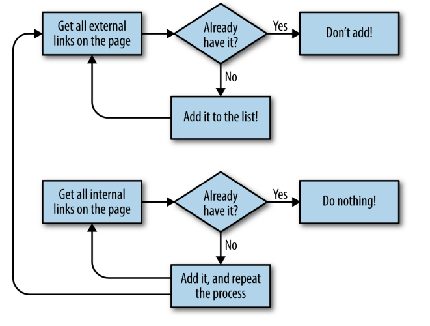

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:
#Collects a list of all external URLs found on the site
allExtLinks = set()
allIntLinks = set()
def getAllExternalLinks(siteUrl):
  html = urlopen(siteUrl)
  bsObj = BeautifulSoup(html)
  internalLinks = getInternalLinks(bsObj,splitAddress(siteUrl)[0])
  externalLinks = getExternalLinks(bsObj,splitAddress(siteUrl)[0])
  for link in externalLinks:
    if link not in allExtLinks:
      allExtLinks.add(link)
      print(link)
  for link in internalLinks:
    if link not in allIntLinks:
      print("About to get link: "+link)
      allIntLinks.add(link)
      getAllExternalLinks(link)


In [ ]:
getAllExternalLinks("http://www.paypal.com")

https://developer.paypal.com/home
https://newsroom.paypal-corp.com
https://developer.paypal.com/
About to get link: https://www.paypal.com/nl/webapps/mpp/home
https://www.paypal.com/nl/webapps/mpp/home
https://www.paypal.com/nl/webapps/mpp/personal
https://www.paypal.com/nl/webapps/mpp/pay-online
https://www.paypal.com/nl/webapps/mpp/send-money-online
https://www.paypal.com/nl/webapps/mpp/mobile-apps
https://www.paypal.com/nl/business
https://www.paypal.com/nl/business/getting-started
https://www.paypal.com/nl/business/solutions
https://www.paypal.com/nl/business/accept-payments
https://www.paypal.com/nl/business/make-payments
https://www.paypal.com/nl/business/manage-risk
https://www.paypal.com/nl/business/accelerate-growth
https://www.paypal.com/nl/business/streamline-operations
https://www.paypal.com/nl/enterprise
https://www.paypal.com/nl/business/platforms-and-marketplaces
https://www.paypal.com/nl/enterprise/platform
https://www.paypal.com/nl/enterprise/accept-payments
https://ww

ValueError: ignored

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random
import re

random.seed(datetime.datetime.now())

def getLinks(articleUrl):
  html = urlopen("http://en.wikipedia.org"+articleUrl)
  bsObj = BeautifulSoup(html)
  return bsObj.find("div", {"id":"bodyContent"}).findAll("a",
  href=re.compile("^(/wiki/)((?!:).)*$"))
  
links = getLinks("/wiki/Kevin_Bacon")

while len(links) > 0:
  newArticle = links[random.randint(0, len(links)-1)].attrs["href"]
  print(newArticle)
  links = getLinks(newArticle)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
/wiki/ISO/IEC_9529
/wiki/OpenDocument
/wiki/Comparison_of_Office_Open_XML_and_OpenDocument
/wiki/Office_Open_XML
/wiki/ISO/IEC_15693
/wiki/ISO_8601
/wiki/ISO-TimeML
/wiki/Lexical_Markup_Framework
/wiki/ISO/TR_11941
/wiki/Water_Resistant_mark
/wiki/Computer_Graphics_Metafile
/wiki/IEC_61850
/wiki/Ethernet_Powerlink
/wiki/C_form-factor_pluggable
/wiki/OC-768
/wiki/History_of_mobile_phones
/wiki/Apple_Inc.
/wiki/Power_Macintosh
/wiki/Power_Mac_G4
/wiki/IMac_G3
/wiki/IPhone_12_Pro
/wiki/Issues_relating_to_the_iOS_operating_system
/wiki/Apple_Podcasts
/wiki/Linux
/wiki/I3wm
/wiki/Vi
/wiki/Mv_(Unix)
/wiki/Hard_link
/wiki/Inode
/wiki/ISBN_(identifier)
/wiki/Book_series
/wiki/Joseph_and_His_Brothers
/wiki/Klaus_Mann
/wiki/Theodor_Storm
/wiki/Christoph_Martin_Wieland
/wiki/Hartmann_von_Aue
/wiki/Heiner_M%C3%BCller
/wiki/Paul_Fleming_(poet)
/wiki/Evangelical_Lutheran_Hymnary
/wiki/Olle_Widestrand
/wiki/Johann_Franck
/wiki/Salmer_

# Storing crawled files 

##API urls tracking [explore]

In [ ]:
pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

from urllib.request import urlopen
from urllib.error import HTTPError

###Realiably request

In [ ]:
def getHtml(url):
  try:
    html = urlopen(url)
  except HTTPError as e:
    print(e)
    return None

  try:
    response = requests.get(url)
    html = response.text
    html = BeautifulSoup(html, 'html.parser')
  except AttributeError as e:
    return None
  
  return html

### URL target

In [ ]:
url ='https://www.programmableweb.com/category/tools/api'

###Extracting data APIs

In [ ]:
count = 0 
dict_apis = {}
while True:
  soup = getHtml(url)
  if soup is None:
    print("URL is not found")
    break
  rows = soup.find_all('tr', {'class':'odd'}) + soup.find_all('tr', {'class':'even'}) 

  for row in rows:
    API_name , API_URL = row.find('a').text, row.find('a').get('href')
    API_category = row.find('td', {'class':'views-field views-field-field-article-primary-category'}).text
    API_description =  row.find('td', {'class':'views-field views-field-field-api-description'}).text
    dict_apis[count] = [ API_name,API_URL, API_category, API_description ]
    count+=1

  url_next = soup.find('a', {'id':'pager_id_apis_all'})
  if url_next != None:
    if url_next.get('href'):
      url = 'https://www.programmableweb.com' + url_next.get('href')
      print(url)
    else:
      break
  else:
    break

https://www.programmableweb.com/category/tools/api?pw_view_display_id=apis_all&page=1
https://www.programmableweb.com/category/tools/api?pw_view_display_id=apis_all&page=2
https://www.programmableweb.com/category/tools/api?pw_view_display_id=apis_all&page=3
https://www.programmableweb.com/category/tools/api?pw_view_display_id=apis_all&page=4
https://www.programmableweb.com/category/tools/api?pw_view_display_id=apis_all&page=5
https://www.programmableweb.com/category/tools/api?pw_view_display_id=apis_all&page=6
https://www.programmableweb.com/category/tools/api?pw_view_display_id=apis_all&page=7
https://www.programmableweb.com/category/tools/api?pw_view_display_id=apis_all&page=8
https://www.programmableweb.com/category/tools/api?pw_view_display_id=apis_all&page=9
https://www.programmableweb.com/category/tools/api?pw_view_display_id=apis_all&page=10
https://www.programmableweb.com/category/tools/api?pw_view_display_id=apis_all&page=11
https://www.programmableweb.com/category/tools/api?p

### Export to CSV file

In [ ]:
print(count)
df_apis = pd.DataFrame.from_dict(dict_apis, orient='index', columns=['API_name','API_URL','API_category','API_description'] )
df_apis.head()
df_apis.to_csv('api_data')
df_apis.head()

,API_name,API_URL,API_category,API_description
0,Residential Proxies API,/api/residential-proxies,Tools,- Automation: developer API that allows contr...
1,Bevigil OSINT,/api/bevigil-osint,Security,Bevigil is a security search engine for mobil...
2,Echobox,/api/echobox,Social,Echobox offers machine learning driven publis...
3,Subdomain Scan,/api/subdomain-scan,Tools,Enter a domain and we'll check for hundreds o...
4,K-meta Keyword Research,/api/k-meta-keyword-research,Keywords,"Domain research, Actual Fresh Keywords metric..."


## Xlsb files tracking  [explore]

In [ ]:
import os
from urllib.request import urlretrieve ##it can be used in dorder to download files from any url
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:
def getAbsoluteURL(baseUrl, source):
  if source.startswith("http://www."):
    url = "http://"+source[11:]
  elif source.startswith("http://"):
    url = source
  elif source.startswith("www."):
    url = source[4:]
    url = "http://"+source
  else:
    if not 'http' in source:
      url = baseUrl+"/"+source
    else:
      url = source
  if baseUrl not in url:
    return None
  return url


In [ ]:
def getDownloadPath(baseUrl, absoluteUrl, downloadDirectory):
  path = absoluteUrl.replace("www.", "")
  path = path.replace(baseUrl, "")
  path = downloadDirectory +"/" + path
  print(path)
  directory = os.path.dirname(path)
  #if os.path.exists(directory):
  #  os.remove(directory)
  if not os.path.exists(directory):
    os.makedirs(directory)
  return path

In [ ]:
downloadDirectory = "downloaded"
baseUrl = "https://www.sii.cl/sobre_el_sii/estadisticas_de_empresas.html"
fileUrl=""

In [ ]:
html = urlopen(baseUrl)
bsObj = BeautifulSoup(html)
downloadList = bsObj.findAll("a", href=True)
for download in downloadList:
  fileUrl = getAbsoluteURL(baseUrl, download["href"])
  if fileUrl is not None:
    #print(fileUrl.replace("/estadisticas_de_empresas.html", ""))
    query_url = fileUrl.replace("/estadisticas_de_empresas.html", "")
    folder_where_has_data = getDownloadPath(baseUrl, query_url, downloadDirectory)
    
    urlretrieve(query_url,  folder_where_has_data)
  

files2022/202112_PUB_TOTAL.xlsb
downloaded/https://sii.cl/sobre_el_sii/files2022/202112_PUB_TOTAL.xlsb
files2022/Infografia_a_las_pymes_SII_AT2021.pdf
downloaded/https://sii.cl/sobre_el_sii/files2022/Infografia_a_las_pymes_SII_AT2021.pdf
files2022/202112_PUB_INI_FIN.xlsb
downloaded/https://sii.cl/sobre_el_sii/files2022/202112_PUB_INI_FIN.xlsb
files2022/202112_PUB_GEN.xlsb
downloaded/https://sii.cl/sobre_el_sii/files2022/202112_PUB_GEN.xlsb
files2022/202112_PUB_GEN_TRAM5.xlsb
downloaded/https://sii.cl/sobre_el_sii/files2022/202112_PUB_GEN_TRAM5.xlsb
files2022/202112_PUB_GEN_TRAM.xlsb
downloaded/https://sii.cl/sobre_el_sii/files2022/202112_PUB_GEN_TRAM.xlsb
files2022/202112_PUB_GEN_TRINT.xlsb
downloaded/https://sii.cl/sobre_el_sii/files2022/202112_PUB_GEN_TRINT.xlsb
files2022/202112_PUB_GEN_REG.xlsb
downloaded/https://sii.cl/sobre_el_sii/files2022/202112_PUB_GEN_REG.xlsb
files2022/202112_PUB_GEN_PROV.xlsb
downloaded/https://sii.cl/sobre_el_sii/files2022/202112_PUB_GEN_PROV.xlsb
files2022

# Scraping code with Javascript


In [ ]:
!pip install pixiedust
!pip install pixiedust_node

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 6.6 MB/s 
  Created wheel for pixiedust: filename=pixiedust-1.1.19-py3-none-any.whl size=321805 sha256=3b87ca64de78eba3ed5731e57838a60b947c30d2a479d19d0d2c717c530cac2c
  Stored in directory: /root/.cache/pip/wheels/05/07/e7/8aca0e820027a63157a916424fd748fb2a2a3e71de5e08eeb8
Successfully built pixiedust
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 
  Created wheel for pixiedust-node: filename=pixiedust_node-0.2.5-py2.py3-none-any.whl size=9404 sha256=eddb333b4cd699e1205f303a5aa1c6b3ca96eabbf85f2d031fae50cdf5b0e01c
  Stored in directory: /root/.cache/pip/wheels/55/aa/60/c117fe683a0069cfd697ba0b5c63093e52616039e72103a5a0
Successfully built pixiedust-node


In [ ]:
import pixiedust_node

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


## Adding modules

In [ ]:
#npm.install('request')
npm.install(('gotScraping','cheerio'));


/tools/node/bin/npm install -s gotScraping cheerio


In [ ]:
%%node
var { spawn } = require('child_process');
var { got-scraping } = require('gotScraping');
var { cheerio } = require('cheerio');

Uncaught
Uncaught


In [ ]:
%%node

const response = await gotScraping('https://news.ycombinator.com/');
const html = response.body;

// Use Cheerio to parse the HTML
const $ = cheerio.load(html);
// Select all the elements with the class name "athing"
const entries = $('.athing');
// Loop through the entries
for (const entry of entries) {
    const element = $(entry);
	// Write each element's text to the terminal
    console.log(element.text());
}

Uncaught
Uncaught


# References



> References

[Javascript and Python web scraping](https://blog.apify.com/web-scraping-javascript-vs-python-2022/)

[Data Science notebooks with nodejs](https://medium.com/codait/nodebooks-node-js-data-science-notebooks-aa140bea21ba)

[Sentiment Analysis from collected data from comments with web scraping](https://www.researchgate.net/publication/353807644_Sentiment_Analysis_Using_Machine_Learning_Algorithms)

[Scrapy documentation](https://docs.scrapy.org/en/latest/intro/tutorial.html)

> Tops & Rankings

[Top 11 free web scraping framework by geekflare](https://geekflare.com/web-scraping-frameworks/#:~:text=Top%2011%20FREE%20Web%20Scraping%20Frameworks%201%20Scrapy,7%20Apify%20...%208%20Kimurai%20...%20M%C3%A1s%20elementos)

> Applicatino for web scraping

[Web scraping tools you should know in 2022](https://www.linkedin.com/pulse/top-5-web-scraping-tools-you-should-know-2022-rajat-thakur)
